In [26]:
# -*- coding: utf-8 -*-
from bs4 import BeautifulSoup
import requests
import time

#read the main page first
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'}
url = "https://old.reddit.com/r/CryptoCurrency/new"
response=requests.get(url, headers=headers)

soup=BeautifulSoup(response.content, "lxml")

time.sleep(0.1)

In [27]:
from datetime import datetime, timedelta

now=datetime.utcnow()
limit_time = now-timedelta(hours=5, minutes=0)
#limit_time_post=now-timedelta(days=2, hours=0, minutes=0)

In [28]:
#Create a dictionnary to count the occurence of cryptocurrency names
f=open("list_cc_names.dat", "r")

dict_cc={}
for name in f:
    #print(name,name[0:-1], len(name))
    
    if len(name)>1:
        dict_cc[name[0:-1].lower()]=0
    

In [29]:

#get the url of comments and creates a new soup object for the entire comment section

for comments_tag in soup.find_all("a", class_="bylink comments may-blank", href=True):

    url_comm = comments_tag['href']
    post_all=comments_tag.parent.parent.parent
    post_nb_of_comments=comments_tag.string


    #post_time=post_all.time["title"]
    #post_time_obj=datetime.strptime(post_time, "%a %b %d %H:%M:%S %Y %Z" )

    r_comm = requests.get(url_comm, headers=headers)
    soup_comm = BeautifulSoup(r_comm.text, "lxml")
    print(url_comm)
    print(post_nb_of_comments)
    print("\n")
    

    #Get the post text
    try :
        post_text=soup_comm.find("div", class_="expando").getText()

        for word in post_text.split():      
            if word.lower() in dict_cc:
                dict_cc[word.lower()]+=1
    except:
        print("#") #some posts have no text



    #Then, let's get all of the comments:
    comms_for_post=soup_comm.find_all("div", class_="entry unvoted")

    for commt in comms_for_post:

        try:

            time_string=commt.time["title"]
            time_obj=datetime.strptime(time_string, "%a %b %d %H:%M:%S %Y %Z" )

            if time_obj>limit_time:

                text=commt.find("div", class_="md").getText()
                #print(time_obj,text)

                for word in text.split() :#.string.split():

                    if word.lower() in dict_cc:
                        dict_cc[word.lower()]+=1


        except:
            print("*")
    time.sleep(.01)
    print("\n")


https://old.reddit.com/r/CryptoCurrency/comments/prq8fz/weekly_sentiments_on_rcc_and_top_10_picks/
3 comments




https://old.reddit.com/r/CryptoCurrency/comments/prq7j8/who_is_the_most_famous_celebrity_you_can_think_of/
14 comments




https://old.reddit.com/r/CryptoCurrency/comments/prq7it/bought_the_dip_el_salvador_purchased_another_150/
3 comments


#
*


https://old.reddit.com/r/CryptoCurrency/comments/prq5y4/why_do_all_of_my_coins_follow_btc_an_explanation/
8 comments




https://old.reddit.com/r/CryptoCurrency/comments/prq4w7/happy_dip_day_crypto_family/
28 comments




https://old.reddit.com/r/CryptoCurrency/comments/prq3eh/reminder_if_you_have_your_money_in_banks_you_can/
9 comments




https://old.reddit.com/r/CryptoCurrency/comments/prq2hp/taxable_events/
11 comments




https://old.reddit.com/r/CryptoCurrency/comments/prpzc4/why_are_we_scared_of_regulators/
19 comments




https://old.reddit.com/r/CryptoCurrency/comments/prpyry/what_upcoming_events_might_create_a_bear_crypt

In [30]:

for entry in dict_cc:
    if dict_cc[entry] != 0:
        
        print(entry,dict_cc[entry])

btc 59
eth 29
ada 5
usdt 2
xrp 1
sol 4
dot 12
link 2
algo 9
matic 6
vet 6
etc 2
atom 5
qnt 2
hot 9
zil 1
flow 1
celr 1
erg 2
alpha 2
alt 4
bit 4
albt 1
farm 1
data 2
gas 5
wild 4
lto 4
dao 4
nft 44
strong 4
auction 2
pro 1
png 1
key 2
elon 2
cut 3
dip 11
el 2
west 2


(-0.5, 999.5, 999.5, -0.5)

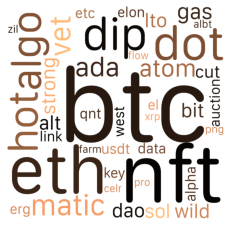

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud


#colormaps that look good:
#"copper"
#BrBG
#PuOr
#twilight (little confusing tho)
wc = WordCloud(background_color="white",width=1000,height=1000, colormap="copper",
               relative_scaling=0.5,normalize_plurals=False, font_path='SFCompactRounded').generate_from_frequencies(dict_cc)
plt.imshow(wc)
plt.axis("off")